# CSE 5526: Programming Assignment #1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Activation function: Logistic Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
# Derivative of sigmoid (for backpropagation)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

## 1. Initialization

In [4]:
# Initialize network parameters
input_size = 4
hidden_size = 4
output_size = 1
learning_rate = 0.05
max_error = 0.05

In [5]:
# Initialize weights and biases with random values between -1 and 1
np.random.seed(42) # For reproducibility
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
bias_output = np.random.uniform(-1, 1, (1, output_size))

weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

(array([[-0.25091976,  0.90142861,  0.46398788,  0.19731697],
        [-0.68796272, -0.68801096, -0.88383278,  0.73235229],
        [ 0.20223002,  0.41614516, -0.95883101,  0.9398197 ],
        [ 0.66488528, -0.57532178, -0.63635007, -0.63319098]]),
 array([[-0.39151551],
        [ 0.04951286],
        [-0.13610996],
        [-0.41754172]]),
 array([[ 0.22370579, -0.72101228, -0.4157107 , -0.26727631]]),
 array([[-0.08786003]]))

In [6]:
# Generate all possible input patterns for 4 binary bits
# inputs = np.array([[int(x) for x in format(i, '04b')] for i in range(16)])

# Only use 4 training samples as inputs
inputs = np.array([[int(x) for x in format(i, '04b')] for i in range(4)])

# Calculate targets based on the parity of the sum of each input pattern
# Output is 1 if the sum of the input pattern (number of 1's) is odd, else 0
targets = np.array([[sum(x) % 2] for x in inputs])

inputs, targets

(array([[0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

## 2. Training Loop for the fixed learning rate (0.05)

In [7]:
# The learning procedure is stopped when an absolute error (difference) of 0.05 is reached for every input pattern.
max_error_allowed = 0.05
max_error = np.inf
epoch = 0
max_errors = []

In [8]:
while max_error > max_error_allowed:
    max_error = 0
    for x, y_true in zip(inputs, targets):
        # Forward pass
        hidden_input = np.dot(x, weights_input_hidden) + bias_hidden  # vj
        hidden_output = sigmoid(hidden_input)                         # yj
        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output   # vk
        y_pred = sigmoid(final_input)                                              # yk
        
        # Calculate error
        error = y_true - y_pred
        max_current_error = np.max(np.abs(error))
        max_error = max(max_error, max_current_error)
        
        # Backpropagation
        d_error_output = error * sigmoid_derivative(final_input)
        error_hidden_layer = d_error_output.dot(weights_hidden_output.T)
        d_error_hidden = error_hidden_layer * sigmoid_derivative(hidden_input)
        
        # Update weights and biases
        weights_hidden_output += learning_rate * hidden_output.T.dot(d_error_output)
        weights_input_hidden += learning_rate * x.reshape(-1, 1).dot(d_error_hidden)
        bias_output += learning_rate * np.sum(d_error_output, axis=0, keepdims=True)
        bias_hidden += learning_rate * np.sum(d_error_hidden, axis=0, keepdims=True)

    # Store maximum error for this epoch
    max_errors.append(max_error)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Max Error: {max_error}")
    
    epoch += 1

Epoch: 0, Max Error: 0.6462593025087462
Epoch: 100, Max Error: 0.5205108557308191
Epoch: 200, Max Error: 0.5053297414121753
Epoch: 300, Max Error: 0.5028821875903882
Epoch: 400, Max Error: 0.5021367567374333
Epoch: 500, Max Error: 0.5032705917085731
Epoch: 600, Max Error: 0.5044064682620776
Epoch: 700, Max Error: 0.505562271206693
Epoch: 800, Max Error: 0.5067444429528543
Epoch: 900, Max Error: 0.5079580808175115
Epoch: 1000, Max Error: 0.5092079527727996
Epoch: 1100, Max Error: 0.5104985628883757
Epoch: 1200, Max Error: 0.5118341158183047
Epoch: 1300, Max Error: 0.5132184741970073
Epoch: 1400, Max Error: 0.5146551261111499
Epoch: 1500, Max Error: 0.5161471729068027
Epoch: 1600, Max Error: 0.5176973466127918
Epoch: 1700, Max Error: 0.519308063790923
Epoch: 1800, Max Error: 0.5209815171000614
Epoch: 1900, Max Error: 0.5227197965856464
Epoch: 2000, Max Error: 0.5245250196099066
Epoch: 2100, Max Error: 0.526399432198322
Epoch: 2200, Max Error: 0.5283454271526942
Epoch: 2300, Max Error: 0.

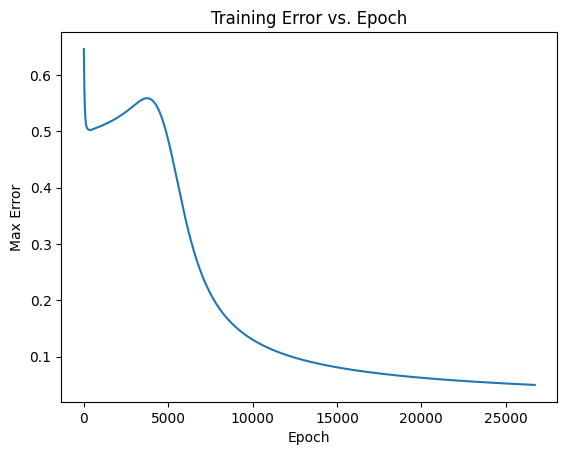

In [9]:
# Plotting training error vs. epoch
plt.plot(range(epoch), max_errors)
plt.xlabel('Epoch')
plt.ylabel('Max Error')
plt.title('Training Error vs. Epoch')
plt.show()

### Discussion:
1. There is an initial fluctuation in error at the very start of training. This is common in the early stages as the model begins to learn from the data. It may be due to the initial weights being far from optimal or the learning rate being high enough to cause some instability.
2. After the initial phase, there is a sharp decline in training error, which suggests that the model starts to learn and improve significantly from the data. This is often observed as the model begins to converge to a set of parameters that minimize the error.
3. As the epochs increase, the rate of decrease in error slows down, and the error curve begins to flatten. This indicates that the model is approaching a point of convergence where further learning improvements are marginal. This is typically where learning starts to plateau.
4. By the end of the graph, the training error seems to have stabilized at a low value, suggesting that the model has converged and additional training epochs may not lead to significant improvements.

In [10]:
# Check the maximum error
print("Training completed. Maximum error among all input patterns:", max_error)

Training completed. Maximum error among all input patterns: 0.04999872860211101


## 3. Training Loop for a varying learning rate 
### learning_rate: 0.05 to 0.5 with an increment of 0.05

In [11]:
# Learning rates to test
learning_rates = np.arange(0.05, 0.55, 0.05)

learning_rates

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [12]:
epochs_required = []

# Train the network with each learning rate
for learning_rate in learning_rates:
    np.random.seed(42)  # Reset the seed for comparability
    weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
    bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
    bias_output = np.random.uniform(-1, 1, (1, output_size))
    
    epochs = 0
    max_error = float('inf')
    while max_error > max_error_allowed:
        max_error = 0
        for x, y_true in zip(inputs, targets):
            # Forward pass
            hidden_input = np.dot(x, weights_input_hidden) + bias_hidden
            hidden_output = sigmoid(hidden_input)
            final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
            y_pred = sigmoid(final_input)
            
            # Calculate error
            error = y_true - y_pred
            max_current_error = np.max(np.abs(error))
            max_error = max(max_error, max_current_error)
            
            # Backpropagation
            d_error_output = error * sigmoid_derivative(final_input)
            error_hidden_layer = d_error_output.dot(weights_hidden_output.T)
            d_error_hidden = error_hidden_layer * sigmoid_derivative(hidden_input)
            
            # Update weights and biases
            weights_hidden_output += learning_rate * hidden_output.T.dot(d_error_output)
            weights_input_hidden += learning_rate * x.reshape(-1, 1).dot(d_error_hidden)
            bias_output += learning_rate * np.sum(d_error_output, axis=0, keepdims=True)
            bias_hidden += learning_rate * np.sum(d_error_hidden, axis=0, keepdims=True)        
        epochs += 1
    
    epochs_required.append(epochs)

In [13]:
epochs_required

[26722, 13377, 8932, 6712, 5383, 4498, 3868, 3398, 3034, 2745]

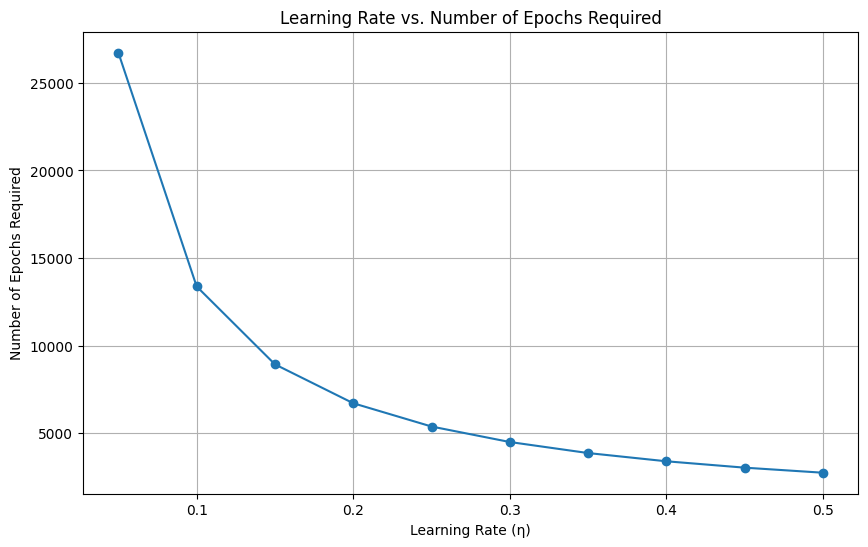

In [14]:
# Plotting learning rates vs. epochs required
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_required, marker='o')
plt.title('Learning Rate vs. Number of Epochs Required')
plt.xlabel('Learning Rate (η)')
plt.ylabel('Number of Epochs Required')
plt.grid(True)
plt.show()

### Discussion:
1. There is a clear decreasing trend in the number of epochs required as the learning rate increases. This is consistent with the expectation that a higher learning rate can lead to faster convergence, as the steps taken towards the minimum of the loss function are larger.
2. Initially, as the learning rate increases from 0.1 to approximately 0.2, there is a steep decline in the number of epochs required. This suggests that within this range, the learning rate was potentially too low initially, leading to slow convergence. As the learning rate increases, the convergence rate improves significantly.
3. After the sharp decline, the curve starts to plateau, with a more gradual decrease in the number of epochs required as the learning rate continues to increase. This could indicate that beyond a certain point, further increases in the learning rate do not significantly speed up learning, and might even risk overshooting the minimum.
4. Based on this graph, there seems to be an optimal range of learning rates where the number of epochs required is minimized without leading to instability in the training process. This range appears to be between approximately 0.2 and 0.3, where further increases in the learning rate do not yield significant improvements in convergence time.

## 4. Training Loop for a varying learning rate and a momentum term
### learning_rate: 0.05 to 0.5 with an increment of 0.05
### momentumL 0.9

In [15]:
momentum_coefficient = 0.9  # β

In [16]:
epochs_required_momentum = []

for learning_rate in learning_rates:
    np.random.seed(42)
    weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
    bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
    bias_output = np.random.uniform(-1, 1, (1, output_size))
    
    # Initialize momentum terms for weights and biases
    momentum_wih = np.zeros_like(weights_input_hidden)
    momentum_who = np.zeros_like(weights_hidden_output)
    momentum_bh = np.zeros_like(bias_hidden)
    momentum_bo = np.zeros_like(bias_output)

    epochs = 0
    max_error = float('inf')
    while max_error > max_error_allowed:
        max_error = 0
        for x, y_true in zip(inputs, targets):
            # Forward pass
            hidden_input = np.dot(x, weights_input_hidden) + bias_hidden
            hidden_output = sigmoid(hidden_input)
            final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
            y_pred = sigmoid(final_input)
            
            # Calculate error
            error = y_true - y_pred
            max_current_error = np.max(np.abs(error))
            max_error = max(max_error, max_current_error)
            
            # Backpropagation
            d_error_output = error * sigmoid_derivative(final_input)
            error_hidden_layer = d_error_output.dot(weights_hidden_output.T)
            d_error_hidden = error_hidden_layer * sigmoid_derivative(hidden_input)
            
            # Update weights and biases with momentum
            delta_wih = (learning_rate * x.reshape(-1, 1).dot(d_error_hidden)) + (momentum_coefficient * momentum_wih)
            delta_who = (learning_rate * hidden_output.T.dot(d_error_output)) + (momentum_coefficient * momentum_who)
            delta_bh = (learning_rate * np.sum(d_error_hidden, axis=0, keepdims=True)) + (momentum_coefficient * momentum_bh)
            delta_bo = (learning_rate * np.sum(d_error_output, axis=0, keepdims=True)) + (momentum_coefficient * momentum_bo)
            
            weights_input_hidden += delta_wih
            weights_hidden_output += delta_who
            bias_hidden += delta_bh
            bias_output += delta_bo
            
            # Update momentum terms
            momentum_wih = delta_wih
            momentum_who = delta_who
            momentum_bh = delta_bh
            momentum_bo = delta_bo
        
        epochs += 1
    
    epochs_required_momentum.append(epochs)

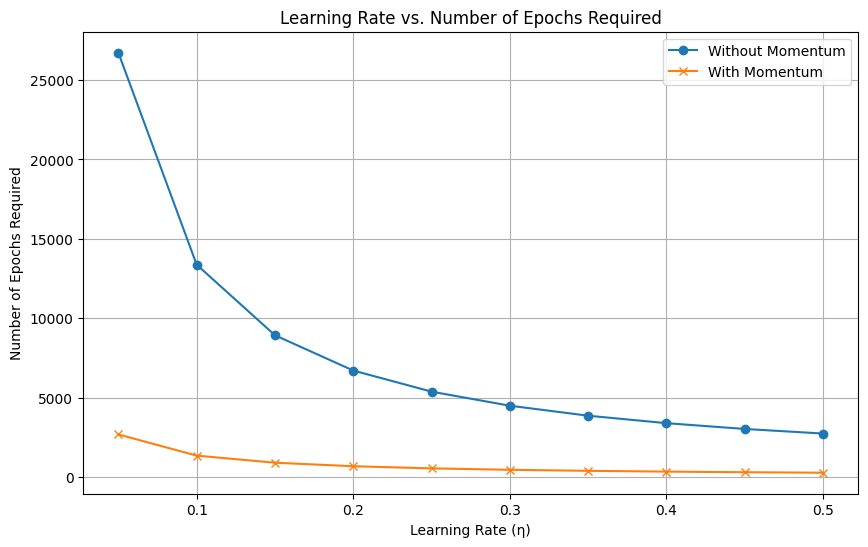

In [17]:
# Plotting learning rates vs. epochs required with and without momentum
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, epochs_required, marker='o', label='Without Momentum')
plt.plot(learning_rates, epochs_required_momentum, marker='x', label='With Momentum')
plt.title('Learning Rate vs. Number of Epochs Required')
plt.xlabel('Learning Rate (η)')
plt.ylabel('Number of Epochs Required')
plt.legend()
plt.grid(True)
plt.show()

### Discussion
1.  The use of momentum significantly reduces the number of epochs required for the model to converge across all learning rates. This demonstrates the effectiveness of momentum as a method to accelerate convergence in gradient-based optimization algorithms.
2.  Both with and without momentum, there is a trend showing that as the learning rate increases, the number of epochs required decreases. This is expected as a higher learning rate allows the model to take larger steps during optimization, potentially reaching the optimal point more quickly.
3.  For both curves, the decline in the number of epochs required levels off as the learning rate approaches 0.5. This suggests that there might be a threshold beyond which further increases in the learning rate do not contribute to a faster convergence, and could potentially lead to divergence or overshooting the minimum.
4.  The improvement due to momentum is consistent across the range of learning rates, showcasing that momentum helps to navigate the optimization landscape more effectively by dampening oscillations and accelerating through flat regions.

## 5. Test Results

In [18]:
# The weights and bias for the hidden layer
weights_input_hidden, bias_hidden

(array([[-0.25091976,  0.90142861,  0.46398788,  0.19731697],
        [-0.68796272, -0.68801096, -0.88383278,  0.73235229],
        [ 1.48289273,  3.74046554, -5.45589553,  5.68489977],
        [ 0.5295188 , -5.83086008, -5.99500379, -2.09414281]]),
 array([[-1.3192312 , -1.51195956,  1.73833673, -0.33169967]]))

In [19]:
# The weights and bias for the output layer
weights_hidden_output, bias_output

(array([[-1.25338114],
        [ 7.32942299],
        [-7.1128198 ],
        [-6.55825784]]),
 array([[4.00833718]]))

In [20]:
# Test with ((1,1,1,0),1)

x = [1, 1, 1, 0]

hidden_input = np.dot(x, weights_input_hidden) + bias_hidden 
hidden_output = sigmoid(hidden_input)                        
final_input = np.dot(hidden_output, weights_hidden_output) + bias_output  
y_pred = sigmoid(final_input)                                          

y_pred

array([[0.97582884]])

In [25]:
# Test with ((1,1,1,1),0)

x = [1, 1, 1, 1]

hidden_input = np.dot(x, weights_input_hidden) + bias_hidden 
hidden_output = sigmoid(hidden_input)                        
final_input = np.dot(hidden_output, weights_hidden_output) + bias_output  
y_pred = sigmoid(final_input)                                          

y_pred

array([[0.05935324]])

In [24]:
# Test with ((0,0,0,1),1)

x = [0, 0, 0, 1]

hidden_input = np.dot(x, weights_input_hidden) + bias_hidden 
hidden_output = sigmoid(hidden_input)                        
final_input = np.dot(hidden_output, weights_hidden_output) + bias_output  
y_pred = sigmoid(final_input)                                          

y_pred

array([[0.95210549]])

### Discussion
1. First Test ((1,1,1,0), 1): The input vector is [1, 1, 1, 0], and the expected output is 1. The predicted value y_pred is approximately 0.9758, which is very close to 1. This suggests that the model is quite confident that the correct class is 1, which aligns with the expected output. This is a correct classification by the model.
2. Second Test ((1,1,1,1), 0): The input vector is [1, 1, 1, 1], and the expected output is 0. The predicted value y_pred is approximately 0.0594, which is close to 0, indicating that the model predicts the class to be 0 with high confidence. This also appears to be a correct classification by the model.
3. Third Test ((0,0,0,1), 1): The input vector is [0, 0, 0, 1], and the expected output is 1. The predicted value y_pred is approximately 0.9521, which means the model is predicting the class to be 1 with high confidence. Again, the model's prediction is in agreement with the expected output, indicating another correct classification.

### Conclusion:
1. The model seems to be very confident in its predictions given the high probability scores for each test case (close to 0 or 1).
2. While the test results are good, without more context on the validation process and performance metrics across a broader test set, we can't determine if the model is generalizing well or potentially overfitting to the training data.
3. The consistent proximity of the predicted values to the expected binary outputs suggests that the model has learned some significant features from the training data that generalize to at least these test cases.